Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
SPDX-License-Identifier: Apache-2.0

# openCypher examples using the air-routes data set

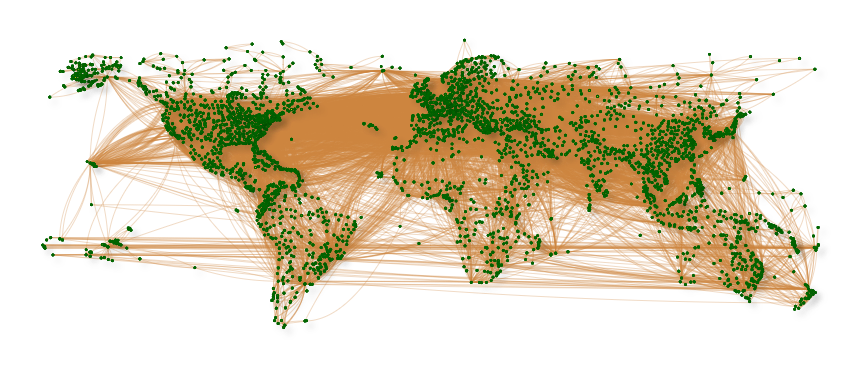

## Introduction
In this Notebook we examine various openCypher queries that explore a property graph that contains a model of the worldwide air route network. There are nodes for airports, countries and continents. There are relationships between airports and between the countries,continents and airports. Each airport has a set of properties and the relationships between airports have a property that represent the distance in miles.

You can find the data set along with many other samples of code and data at the following GitHub repository: https://github.com/krlawrence/graph

## A note on basic terminology

There are a few commonly used terms used when working with graph databases. The three main ones being node or vertex, edge or relationship, and property. Different communites tend to have some subset of these they use more often. The Apache TinkerPop Gremlin documentation for example uses the terms Vertex and Edge exclusively whereas users of openCypher more commonly use Node and Relationship. The examples presented in this notebook follow those same conventions.  One other area where the terminology differs is that edge labels in Gremlin are commonly referred to as a type of relationship in openCypher.


### Let's check our configuration and Neptune cluster status
Before we start running any queries let's first of all make sure we are connected to Neptune and that the cluster is ready. Note that `%graph_notebook_config` will return the current configuration of your notebook. If, for example, you wanted to connect to a different Amazon Neptune endpoint you could create a cell with `%%graph_notebook_config` at the top, paste the results from running `%graph_notebook_config` into it, make the required edits and run the cell. Commands that start with a single percent sign are known as **_line magics_** and commands that start with two percent signs are known as **_cell magics_**.

In [ ]:
%graph_notebook_version

#### Using a different endpoint
You can change the endpoint that this notebook is connected to at any time using the `%graph_notebook_host` or `%%graph_notebook_config` commands. Edit and run the cell below whenever you need to change the endpoint you are connected to.

In [ ]:
%graph_notebook_host your-hostname-here

In [ ]:
%graph_notebook_config

In [ ]:
%status

## Loading data
### Now let's load some property graph data.
The cell below makes it easy to load the air-routes data into your Neptune cluster in a form compatible with both Gremlin and openCypher queries. When you run the cell you will be prompted to select a `Source type`, a `Data model`, and a `Data set`. Select `samples`, `property_graph`, and `airports`, respectively.

**You only need to do this once**. If you have already loaded the data previously you do not need to load it again.

In [ ]:
%seed

## Seeing a visual representation of your query

The results of any openCypher query that returns a path (`MATCH p= ... RETURN p`) or simple list of nodes can be displayed visually. When such queries are run you will see a `Graph` tab in the query results area alongside the `Console` tab. Specific visualization features will be explained  using examples throughout this notebook. 


### Query visualization hints

Settings can be used to give the visual renderer hints as to how to label the nodes drawn.

You can specify query visualization hints using  `-d`, `-de`, `-l` and `-g` after the `%%oc` or `opencypher` cell "magics". Either one of them can be used to run an openCypher query. The syntax in general is:

`%%opencypher -d $my_vertex_mapping -de $my_edge_mapping -l <max label length> -g <property to group by>`

All of these settings are optional. By default nodes in the visualization display their label text. The parameter `$my_mapping` refers to a Python variable that you create in a different cell that provides a mapping from a node's label to the name of a property you prefer be used to label nodes in the visualization. For example

`my_vertex_mapping = '{"airport":"city","country":"code"}`

In cases where each node will be labelled usding a single property name the -d option does not require a map. The property name is all that is needed. The same is true for edges and the -de option.

`%%opencypher -d city -de dist`

By default labels shown in the visualization are truncated at 10 characters and the last 3 of the ten are replaced by an ellipsis. You can override this setting using the `-l` setting. For example:

`%%opencypher -l 20`

Nodes in the visualization are colored (grouped) using their labels by default. You can change this using the `-g` option. For example, to group nodes by the `country` property:

`%%opencypher -g country`

Grouping can be completely disabled using the `--ignore-groups` option.


### Adjusting the visualization layout and other settings
You can further adjust many of the visualization settings using the two commands

- `%graph_notebook_vis_options`
- `%%graph_notebook_vis_options`

There are examples of how to use these settings and links to additional documentation at the bottom of this notebook.

## Getting help
You can get help at any time using the `--help` option as follows (the cell body needs at least one character in it for `--help` to work). 

`%%opencypher --help`

Several of other the magic commands will accept `--help`. Each of the options described above also has a long form. For example `-d` can also be specified using `--display-options`. Run the cell below to see the full help text for the `%%opencypher` command.


In [ ]:
%%opencypher --help
x

## Example openCypher Queries
The notebook cells that follow contain various queries that showcase both features of the openCypher query language and features of the Amazon Neptune Notebooks. Note that either `%%oc` or `%%opencypher` may be used to denote that a cell contains an openCypher query.

### Let's find out a bit about the nodes and relationships in the graph
The query below looks for 5 nodes and returns the ID, label and properties for each.

In [ ]:
%%oc
MATCH (n)
RETURN n
LIMIT 5

As with nodes, every relationship has a label. In openCypher, relationship labels are referred to as "types".

In [ ]:
%%oc
MATCH (n)-[e]->()
RETURN type(e) AS Type ,count(*) AS Count

### Sampling some airports
Each time the cell below is run, a sample of 50 airports is returned.

In [ ]:
%%oc
MATCH (a:airport)
RETURN a.code as Code, a.desc AS Desc, rand() AS r
ORDER BY r
LIMIT 50

### Finding all routes from Cozumel (CZM)
Try running the two cells below and clicking on the `Graph` tab to see the route map for flights from Cozumel. 

In [ ]:
my_edge_labels = '{"route":"dist"}'
my_node_labels = '{"airport":"city"}'

In [ ]:
%%oc -d $my_node_labels -de $my_edge_labels -l 20
MATCH p = (a:airport {code:'CZM'})-[:route]->()
RETURN p

### Returning just the airport codes
To return just the source and destination airport codes either of the following queries can be used.

In [ ]:
%%oc
MATCH (a:airport {code: 'CZM'})-[:route]->(b:airport)
RETURN a.code as Source, b.code AS Destination

In [ ]:
%%oc
MATCH (a:airport)-[:route]->(b:airport)
WHERE a.code = 'CZM'
RETURN a.code as Source, b.code AS Destination


Let's run the same query but this time return the city names.

In [ ]:
%%oc
MATCH (a:airport)-[:route]->(b:airport)
WHERE a.code = 'CZM'
RETURN a.city AS Source, b.city AS Destination

### Using the details view
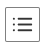

Run the query below, select the `Graph` tab, select a node or relationship in the graph and click on the details button (the one with three .- one above the other). As you select different nodes and relationships the details view window will update. This is useful when you want to explore lots of properties for multiple elements using the `Graph` view.

In [ ]:
my_node_labels = '{"airport":"city"}'

In [ ]:
%%oc -d $my_node_labels
MATCH p = (a:airport {code:'CZM'})-[:route]->()
RETURN p

### Coloring nodes by group

To group nodes together by color we us the `-g` or `--group-by` switch with the `%%oc` magic command.  This specifies the property of the node to use to group items together.  If no property is specified than items will be grouped by their label.  Grouping of items is enabled by default but can be disabled using the `--ignore-groups` option.  

 You can also zoom the visualization in and out by clicking on the + and - icons.

**Clicking on the fullscreen icon in the Graph view will increase the size of the canvas.**
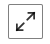

Run the query below, select the Graph tab, and you will see that the vertices in the graph are now colored based on the country name.

In [ ]:
my_edge_labels = '{"route":"dist"}'
my_node_labels = '{"airport":"city"}'

In [ ]:
%%oc -d $my_node_labels -de $my_edge_labels -g country -l 20
MATCH p = (a:airport {code:'CZM'})-[:route]->()
RETURN p

In cases where each node will be labelled usding a single property name the `-d` options does not require a map. The property name is all that is needed. The same is true for edges and the `-de` option.

In [ ]:
%%oc -d city -de dist -g country -l 20
MATCH p = (a:airport {code:'CZM'})-[:route]->()
RETURN p

### How long are the routes from Cozumel?
In order to find the distance of a route we need to look at the relationship properties.

In [ ]:
%%oc
MATCH (a:airport {code:'CZM'})-[r:route]->(b:airport)
RETURN a.code AS Source, r.dist AS Distance, b.code AS Destination
ORDER BY r.dist

### Exploring countries
The query below finds the countries in the graph. You can use the Search box to find a country quickly after running the query. The results are ordered in ascending order by country name.

In [ ]:
%%oc
  MATCH (c:country)
  RETURN c.code AS Country, c.desc AS Description
  ORDER BY c.desc 

### Exploring countries and airports
The query below selects five countries and finds all the airports located in those countries. If you want to see a few more countries in the results you can increase the value used by the `LIMIT` clause. 

In [ ]:
%%oc
MATCH (c:country)
WITH c
LIMIT 5
MATCH (c)-[:contains]->(a:airport)
RETURN c.desc AS Country, a.desc AS Airport
ORDER BY Country

### Finding all airports in the United Kingdom (UK)
The query below finds the node representing the United Kingdom in the graph and from there finds all of the airports connected to it by 'contains' relationships. The results are sorted in ascending order using the airport code.

In [ ]:
%%oc
MATCH (c:country {code:'UK'})-[:contains]->(a:airport)
RETURN a.code AS Code, a.desc AS Name
ORDER BY a.code

In [ ]:
my_node_labels = '{"airport":"city","country":"desc"}'

In [ ]:
%%oc -g region -d $my_node_labels -l 20
MATCH p=(c:country {code:'UK'})-[:contains]->(a:airport)
RETURN p

### Which airports have the most routes?
The query below allows us to find the 20 airports with the most routes.

In [ ]:
%%oc
MATCH (a:airport)-[:route]->(:airport)
RETURN a.code AS Code, a.city AS City, count(a) AS Routes
ORDER BY Routes DESC
LIMIT 20

### Let's find some routes from Austin (AUS) to Wellington (WLG)
The three queries below find five routes from Austin in the United States to Wellington in New Zealand. The first two use a fixed number of hops. The third one uses a variable length path expression.

In [ ]:
%%oc
MATCH (aus:airport {code:'AUS'})-->(h1:airport)-->(h2:airport)-->(wlg:airport {code:'WLG'})
RETURN aus.code AS Source, h1.code AS Stop_1, h2.code AS Stop_2, wlg.code AS Destination
LIMIT 5

In [ ]:
my_node_labels = '{"airport":"city"}'
my_edge_labels = '{"route":"dist"}'

In [ ]:
%%oc -d $my_node_labels -de $my_edge_labels -g country -l 15
MATCH p=(aus:airport {code:'AUS'})-->(h1:airport)-->(h2:airport)-->(wlg:airport {code:'WLG'})
RETURN p
LIMIT 5

In [ ]:
my_node_labels = '{"airport":"city"}'
my_edge_labels = '{"route":"dist"}'

In [ ]:
%%oc -d $my_node_labels -g country -de $my_edge_labels -l 15
MATCH p = (aus:airport {code:'AUS'})-[:route*1..3]->(wlg:airport {code:'WLG'})
RETURN p
LIMIT 5

To also retrieve the distance between airports we need to inspect some relationship properties. One way to do that is to just add the edges to the query motif pattern.

In [ ]:
%%oc
MATCH (aus:airport {code:'AUS'})-[r1:route]->(h1:airport)-[r2:route]->(h2:airport)-[r3:route]->(wlg:airport {code:'WLG'})
RETURN aus.code AS Source,
       r1.dist AS Hop_1,
       h1.code AS Stop_1,
       r2.dist AS Hop_2,
       h2.code AS Stop_2,
       r3.dist AS Hop_3,
       wlg.code AS Destination
LIMIT 5

### Finding the total distance of selected routes
Now we have the relationship properties available in results the we can retrieve the distances, generate some totals and do some ordering.

In [ ]:
%%oc
MATCH (aus:airport {code:'AUS'})-[r1:route]->(h1:airport)-[r2:route]->(h2:airport)-[r3:route]->(wlg:airport {code:'WLG'})
RETURN aus.code AS Source,
       r1.dist AS Hop_1,
       h1.code AS Stop_1,
       r2.dist AS Hop_2,
       h2.code AS Stop_2,
       r3.dist AS Hop_3,
       wlg.code AS Destination,
       r1.dist + r2.dist + r3.dist AS Total
ORDER BY Total ASC
LIMIT 5

### Where can I fly to from Santa Fe, New Mexico, nonstop?

The query below finds the cities you can fly to nonstop from Santa Fe, New Mexico.

In [ ]:
%%oc 
MATCH (saf:airport {code:'SAF'})-->(dest)
RETURN saf.city AS Source, dest.city AS Destination

In [ ]:
%%oc -d $my_node_labels -l 20
MATCH p = (saf:airport {code:'SAF'})-->(dest)
RETURN p

### Where can I fly to from Santa Fe, New Mexico, with one stop?
We can modify the previous query to answer the question "How many places can you get to from Santa Fe, New Mexico, with one stop but excluding the places you can get to nonstop?".  A check is also added that guarantees we do not include flights back to Santa Fe in the results.

In [ ]:
%%oc
MATCH (saf:airport)-[*2]->(dest) 
WHERE saf.code='SAF' AND NOT (saf)-->(dest) AND dest <> saf
RETURN count(DISTINCT dest)

Rather than just counting the places, we can change the query to list all of the city names.

In [ ]:
%%oc
MATCH (saf:airport)-[*2]->(dest) 
WHERE saf.code='SAF' AND NOT (saf)-->(dest) AND dest <> saf
RETURN DISTINCT dest.city AS City
ORDER BY City

### Flights from New Zealand to Australia
The query below looks for any flights originating in New Zealand and terminating in Australia.

In [ ]:
%%oc 
MATCH (a:airport)-->(b:airport)
WHERE a.country = 'NZ' AND b.country='AU'
RETURN a.city AS NewZealand, b.city AS Australia
ORDER BY a.city , b.city

Changing the query to return all the paths found allows us to see the results visually.

In [ ]:
my_node_labels = '{"airport":"city"}'

In [ ]:
%%oc -d $my_node_labels -g country
MATCH p = (a:airport)-->(b:airport)
WHERE a.country = 'NZ' AND b.country='AU'
RETURN p 

### Examining a slightly larger result set visually
The query below retrieves a selection of routes from the graph. If you click on the `Graph` tab you will see the nodes and relationships. You may want to zoom in and out (using the scroll wheel on your mouse or the zoom gesture on your touchpad) and also pan the drawing by holding down the left mouse button while the pointer is not over a vertex or an edge and dragging. You can also move vertices around if they are overlapping by dragging them. Switching to the fullscreen view is also helpful when there are a lot of results to explore. You can also zoom the visualization in and out by clicking on the + and - icons. 

To see even more results try increasing the value used by the `Limit` step from 200 to 300 or 400.

In [ ]:
my_node_labels = '{"airport":"code"}'

In [ ]:
%%oc -d $my_node_labels -g country
MATCH p = (a:airport)-[:route]->(b)
RETURN p
LIMIT 200

## Changing the visualization settings
The Amazon Neptune Notebooks use an open source library called [Vis.js](https://github.com/visjs) to assist with drawing the graph diagrams. Vis.js provides a rich set of customizable settings. The documentation for most of the visualization settings used in this notebook can be found [here](https://visjs.org/) and in particular the graph network drawing documentation can be found [here](https://visjs.github.io/vis-network/docs/network/).  

To see the current settings used by your notebook you can use the `%graph_notebook_vis_options` line magic command. Try running the cell below.  

To change any of these settings create a new cell and use `%%graph_notebook_vis_options` to change them (note the two percent signs indicating a cell magic).

These settings give you a lot of flexibility to customize your visualizations in whichever way you find most pleasing.

In [ ]:
%graph_notebook_vis_options

### Producing a hierarchical diagram
For some types of query using a hierarchical view is quite pleasing. Try running the cell below to change a few settings and then run the next cell that demonstrates the changes. There is another cell after that one you can use to restore the default settings.

In [ ]:
%%graph_notebook_vis_options
{
  "nodes": {
    "borderWidthSelected": 0,
    "borderWidth": 0,
    "color": {
      "background": "rgba(210, 229, 255, 1)",
      "border": "transparent",
      "highlight": {
        "background": "rgba(9, 104, 178, 1)",
        "border": "rgba(8, 62, 100, 1)"
      }
    },
    "shadow": {
      "enabled": false
    },
    "shape": "circle",
    "widthConstraint": {
      "minimum": 70,
      "maximum": 70
    },
    "font": {
      "face": "courier new",
      "color": "black",
      "size": 12
    }
  },
  "edges": {
    "color": {
      "inherit": false
    },
    "smooth": {
      "enabled": true,
      "type": "straightCross"
    },
    "arrows": {
      "to": {
        "enabled": true,
        "type": "arrow"
      }
    },
    "font": {
      "face": "courier new"
    }
  },
  "interaction": {
    "hover": true,
    "hoverConnectedEdges": true,
    "selectConnectedEdges": false
  },
  "physics": {
    "hierarchicalRepulsion": {
      "centralGravity": 0
    },
    "minVelocity": 0.75,
    "solver": "hierarchicalRepulsion"
  },
  "layout": {
    "hierarchical": { 
      "enabled": true,
      "direction": "LR",
      "sortMethod": "directed",
      "edgeMinimization":false }
  }
}


Run the query in the cell below to see the results of changing to a hierarchical network view.

In [ ]:
%%oc -d $my_node_labels -g country
MATCH p=(aus:airport {code:'AUS'})-->(h1:airport)-->(h2:airport)-->(wlg:airport {code:'WLG'})
RETURN p
LIMIT 5

### Changing Group Colors and Adding Icons

One of the features that is also available is the ability to change the color, add an image, or associate a particular icon representation for a group.  Run the two cells below and you will see that all airports in Mexico are shown with the Mexican flag, all airports in the US are shown as a blue flag, and all airports in Canada are shown in red.

In [ ]:
%%graph_notebook_vis_options
{
  "groups": {
    "CA": {"color": "red"},
    "MX": {"shape": "image", 
               "image":"https://cdn.countryflags.com/thumbs/mexico/flag-round-250.png"},
    
    "US": {
      "shape": "icon",
      "icon": {
        "face": "FontAwesome",
        "code": "\uf024",
        "color": "blue"
      }
  }
}
}

In [ ]:
my_node_labels = '{"airport":"city"}'

In [ ]:
%%oc -g country -d $my_node_labels 
MATCH p = (a:airport {code:'CZM'})-->(b)
RETURN p

### Restoring default settings
Running the cell below will return all visualization settings to their default values. 

In [ ]:
%graph_notebook_vis_options reset

## Variable substitution and reuse
The `--store-to` option can be used to capture query results in a Python variable.

In [ ]:
%%oc --store-to res
MATCH (a:airport {region:'US-TX'})
RETURN count(a) AS texas

In [ ]:
print(f'There are {res["results"][0]["texas"]} airports in Texas')

A variable can also be substituted into a query.

In [ ]:
city = 'Los Angeles'

In [ ]:
%%oc
MATCH (a:airport {city:'${city}'})
RETURN a.desc AS Description, a.code AS Code

## Seeing more data
If you run the cell below, the notebook will use as much of the browser window (width wise) as it can

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))